In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
sess = tf.Session(config = tf.ConfigProto(log_device_placement = True))

import keras
keras.backend.set_session(sess)
keras.backend.clear_session()

from CP_Detection.Preprocessing import DataPrep, DataReformatter
from CP_Detection.Model import Conv1dAE
from CP_Detection.Visualization import PlotApproachCurve, PlotHistory, PlotReconstruction, PlotLatent
from CP_Detection.IOtools import SaveModel, LoadModel, RunandSave

Using TensorFlow backend.


In [2]:
filepath = '../Raw Data/Shear_Mode/Dohyun_best'
savepath = '../Raw Data/DohyunBest_revised.npz'

_ = DataReformatter(filepath, savepath)

Saved data to: ../Raw Data/DohyunBest_revised.npz


Number of test samples : 31
Number of training samples : 279
(14, 310)


Text(0.5, 0.98, 'Amplitude and Phase Curves for the Test Dataset (31 curves)')

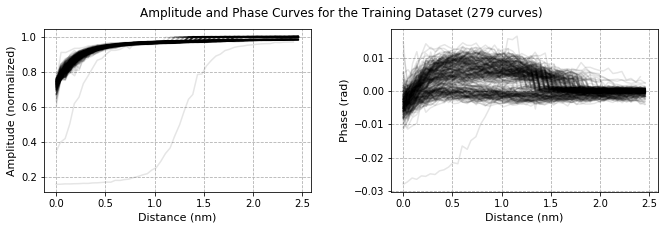

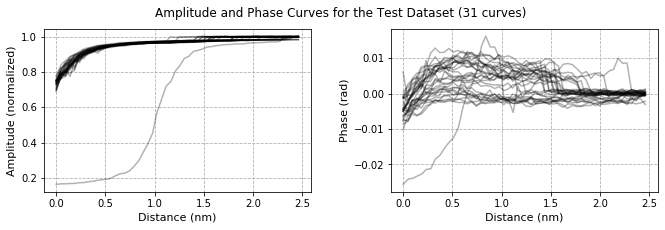

In [3]:
# filepath to the reformatted data file
filepath = '../Raw Data/DohyunBest_revised.npz'
test_ratio = 0.1

train_dataset, test_dataset, train, test = DataPrep(filepath, test_ratio)

# Graph the training set
fig1 = PlotApproachCurve(train, alpha = 0.1)
fig1.suptitle('Amplitude and Phase Curves for the Training Dataset (%d curves)' %(train.shape[0]), fontsize = 12)

fig2 = PlotApproachCurve(test, alpha = 0.3)
fig2.suptitle('Amplitude and Phase Curves for the Test Dataset (%d curves)' %(test.shape[0]), fontsize = 12)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Sequence_Input (InputLayer)     (None, 54, 2)        0                                            
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 54, 64)       704         Sequence_Input[0][0]             
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 54, 64)       0           conv1d_1[0][0]                   
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 54, 64)       20544       activation_1[0][0]               
__________________________________________________________________________________________________
activation

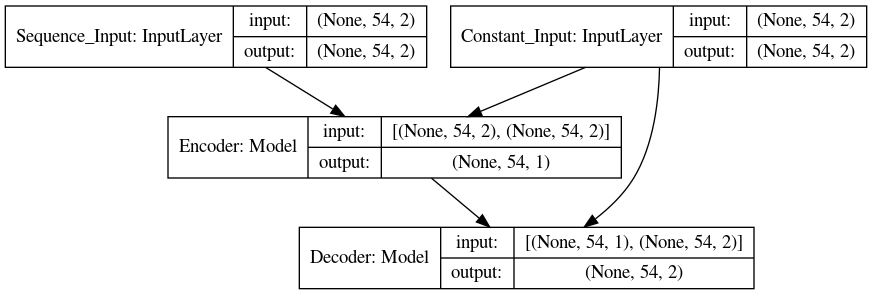

In [4]:
seq_length = train.shape[1]
abstraction_block = 'C:64|C:64|C:64|C:64'
composition_block = 'P:64|P:32|P:16|P:8'

model, hyperparameters = Conv1dAE(seq_length = seq_length, abstraction_block = abstraction_block, 
                                  composition_block = composition_block, batch_norm = False, dropout_rate = 0.0, lr = 1e-4)

autoencoder = model['autoencoder']
encoder = model['encoder']

from keras.utils.vis_utils import plot_model
plot_model(autoencoder, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image(filename='model_plot.png') 

In [ ]:
savepath = '../Training Results/0828_.zip'
RunandSave(model, hyperparameters, train, test, savepath, min_epochs = 30000, max_epochs = 120000)

Train on 279 samples, validate on 31 samples
Epoch 1/30000
279/279 [==============================] - 2s 7ms/step - loss: 0.9030 - amp_mse: 0.9015 - phas_mse: 0.0014 - val_loss: 0.8822 - val_amp_mse: 0.8807 - val_phas_mse: 0.0015
Epoch 2/30000
279/279 [==============================] - 0s 254us/step - loss: 0.8836 - amp_mse: 0.8820 - phas_mse: 0.0015 - val_loss: 0.8602 - val_amp_mse: 0.8586 - val_phas_mse: 0.0016
Epoch 3/30000
279/279 [==============================] - 0s 230us/step - loss: 0.8588 - amp_mse: 0.8572 - phas_mse: 0.0016 - val_loss: 0.8323 - val_amp_mse: 0.8306 - val_phas_mse: 0.0017
Epoch 4/30000
279/279 [==============================] - 0s 254us/step - loss: 0.8274 - amp_mse: 0.8255 - phas_mse: 0.0019 - val_loss: 0.7949 - val_amp_mse: 0.7928 - val_phas_mse: 0.0021
Epoch 5/30000
279/279 [==============================] - 0s 248us/step - loss: 0.7770 - amp_mse: 0.7747 - phas_mse: 0.0023 - val_loss: 0.7228 - val_amp_mse: 0.7200 - val_phas_mse: 0.0027
Epoch 6/30000
279/279 

Epoch 43/30000
279/279 [==============================] - 0s 254us/step - loss: 8.7280e-04 - amp_mse: 8.2828e-04 - phas_mse: 4.4523e-05 - val_loss: 0.0034 - val_amp_mse: 0.0034 - val_phas_mse: 5.8586e-05
Epoch 44/30000
279/279 [==============================] - 0s 247us/step - loss: 8.3452e-04 - amp_mse: 7.9283e-04 - phas_mse: 4.1682e-05 - val_loss: 0.0033 - val_amp_mse: 0.0033 - val_phas_mse: 5.4841e-05
Epoch 45/30000
279/279 [==============================] - 0s 265us/step - loss: 8.0644e-04 - amp_mse: 7.6754e-04 - phas_mse: 3.8904e-05 - val_loss: 0.0032 - val_amp_mse: 0.0032 - val_phas_mse: 5.2040e-05
Epoch 46/30000
279/279 [==============================] - 0s 239us/step - loss: 7.7886e-04 - amp_mse: 7.4323e-04 - phas_mse: 3.5625e-05 - val_loss: 0.0032 - val_amp_mse: 0.0031 - val_phas_mse: 4.9282e-05
Epoch 47/30000
279/279 [==============================] - 0s 254us/step - loss: 7.4610e-04 - amp_mse: 7.1277e-04 - phas_mse: 3.3333e-05 - val_loss: 0.0031 - val_amp_mse: 0.0030 - val_p

279/279 [==============================] - 0s 233us/step - loss: 3.1782e-04 - amp_mse: 2.9840e-04 - phas_mse: 1.9419e-05 - val_loss: 0.0012 - val_amp_mse: 0.0012 - val_phas_mse: 4.0809e-05
Epoch 84/30000
279/279 [==============================] - 0s 236us/step - loss: 3.1066e-04 - amp_mse: 2.9133e-04 - phas_mse: 1.9324e-05 - val_loss: 0.0012 - val_amp_mse: 0.0011 - val_phas_mse: 3.8918e-05
Epoch 85/30000
279/279 [==============================] - 0s 250us/step - loss: 3.0719e-04 - amp_mse: 2.8806e-04 - phas_mse: 1.9126e-05 - val_loss: 0.0011 - val_amp_mse: 0.0011 - val_phas_mse: 3.7774e-05
Epoch 86/30000
279/279 [==============================] - 0s 255us/step - loss: 2.9543e-04 - amp_mse: 2.7690e-04 - phas_mse: 1.8530e-05 - val_loss: 0.0011 - val_amp_mse: 0.0011 - val_phas_mse: 3.6665e-05
Epoch 87/30000
279/279 [==============================] - 0s 251us/step - loss: 2.9049e-04 - amp_mse: 2.7160e-04 - phas_mse: 1.8888e-05 - val_loss: 0.0010 - val_amp_mse: 0.0010 - val_phas_mse: 3.5660

Epoch 122/30000
279/279 [==============================] - 0s 248us/step - loss: 1.5043e-04 - amp_mse: 1.3766e-04 - phas_mse: 1.2764e-05 - val_loss: 2.5384e-04 - val_amp_mse: 2.3906e-04 - val_phas_mse: 1.4774e-05
Epoch 123/30000
279/279 [==============================] - 0s 228us/step - loss: 1.4609e-04 - amp_mse: 1.3297e-04 - phas_mse: 1.3115e-05 - val_loss: 2.4439e-04 - val_amp_mse: 2.2950e-04 - val_phas_mse: 1.4894e-05
Epoch 124/30000
279/279 [==============================] - 0s 229us/step - loss: 1.4485e-04 - amp_mse: 1.3233e-04 - phas_mse: 1.2520e-05 - val_loss: 2.3455e-04 - val_amp_mse: 2.1968e-04 - val_phas_mse: 1.4868e-05
Epoch 125/30000
279/279 [==============================] - 0s 235us/step - loss: 1.4145e-04 - amp_mse: 1.2899e-04 - phas_mse: 1.2460e-05 - val_loss: 2.2649e-04 - val_amp_mse: 2.1211e-04 - val_phas_mse: 1.4383e-05
Epoch 126/30000
279/279 [==============================] - 0s 226us/step - loss: 1.3948e-04 - amp_mse: 1.2759e-04 - phas_mse: 1.1889e-05 - val_loss:

279/279 [==============================] - 0s 330us/step - loss: 1.1344e-04 - amp_mse: 1.0315e-04 - phas_mse: 1.0297e-05 - val_loss: 1.2826e-04 - val_amp_mse: 1.1557e-04 - val_phas_mse: 1.2693e-05
Epoch 161/30000
279/279 [==============================] - 0s 284us/step - loss: 1.1303e-04 - amp_mse: 1.0312e-04 - phas_mse: 9.9123e-06 - val_loss: 1.2756e-04 - val_amp_mse: 1.1504e-04 - val_phas_mse: 1.2525e-05
Epoch 162/30000
279/279 [==============================] - 0s 258us/step - loss: 1.1327e-04 - amp_mse: 1.0309e-04 - phas_mse: 1.0175e-05 - val_loss: 1.2576e-04 - val_amp_mse: 1.1244e-04 - val_phas_mse: 1.3320e-05
Epoch 163/30000
279/279 [==============================] - 0s 259us/step - loss: 1.1283e-04 - amp_mse: 1.0244e-04 - phas_mse: 1.0391e-05 - val_loss: 1.2905e-04 - val_amp_mse: 1.1636e-04 - val_phas_mse: 1.2693e-05
Epoch 164/30000
279/279 [==============================] - 0s 281us/step - loss: 1.1241e-04 - amp_mse: 1.0187e-04 - phas_mse: 1.0533e-05 - val_loss: 1.2756e-04 - va

279/279 [==============================] - 0s 240us/step - loss: 1.0498e-04 - amp_mse: 9.5098e-05 - phas_mse: 9.8830e-06 - val_loss: 1.1481e-04 - val_amp_mse: 1.0298e-04 - val_phas_mse: 1.1836e-05
Epoch 199/30000
279/279 [==============================] - 0s 242us/step - loss: 1.0727e-04 - amp_mse: 9.7870e-05 - phas_mse: 9.3971e-06 - val_loss: 1.1335e-04 - val_amp_mse: 1.0071e-04 - val_phas_mse: 1.2644e-05
Epoch 200/30000
279/279 [==============================] - 0s 233us/step - loss: 1.0954e-04 - amp_mse: 9.9814e-05 - phas_mse: 9.7237e-06 - val_loss: 1.1542e-04 - val_amp_mse: 1.0224e-04 - val_phas_mse: 1.3180e-05
Epoch 201/30000
279/279 [==============================] - 0s 318us/step - loss: 1.0473e-04 - amp_mse: 9.5256e-05 - phas_mse: 9.4755e-06 - val_loss: 1.1329e-04 - val_amp_mse: 1.0111e-04 - val_phas_mse: 1.2184e-05
Epoch 202/30000
279/279 [==============================] - 0s 322us/step - loss: 1.0571e-04 - amp_mse: 9.6097e-05 - phas_mse: 9.6096e-06 - val_loss: 1.1290e-04 - va

279/279 [==============================] - 0s 229us/step - loss: 1.0337e-04 - amp_mse: 9.0243e-05 - phas_mse: 1.3123e-05 - val_loss: 1.0870e-04 - val_amp_mse: 9.6985e-05 - val_phas_mse: 1.1717e-05
Epoch 237/30000
279/279 [==============================] - 0s 256us/step - loss: 1.0094e-04 - amp_mse: 8.9585e-05 - phas_mse: 1.1353e-05 - val_loss: 1.0849e-04 - val_amp_mse: 9.7120e-05 - val_phas_mse: 1.1371e-05
Epoch 238/30000
279/279 [==============================] - 0s 234us/step - loss: 9.8760e-05 - amp_mse: 8.8813e-05 - phas_mse: 9.9470e-06 - val_loss: 1.0909e-04 - val_amp_mse: 9.7655e-05 - val_phas_mse: 1.1437e-05
Epoch 239/30000
279/279 [==============================] - 0s 236us/step - loss: 9.8286e-05 - amp_mse: 8.9360e-05 - phas_mse: 8.9265e-06 - val_loss: 1.0825e-04 - val_amp_mse: 9.6589e-05 - val_phas_mse: 1.1659e-05
Epoch 240/30000
279/279 [==============================] - 0s 245us/step - loss: 9.8231e-05 - amp_mse: 8.8836e-05 - phas_mse: 9.3951e-06 - val_loss: 1.0821e-04 - va

279/279 [==============================] - 0s 301us/step - loss: 9.7124e-05 - amp_mse: 8.6954e-05 - phas_mse: 1.0170e-05 - val_loss: 1.0435e-04 - val_amp_mse: 9.3220e-05 - val_phas_mse: 1.1133e-05
Epoch 275/30000
279/279 [==============================] - 0s 300us/step - loss: 9.7256e-05 - amp_mse: 8.7737e-05 - phas_mse: 9.5193e-06 - val_loss: 1.0690e-04 - val_amp_mse: 9.5768e-05 - val_phas_mse: 1.1133e-05
Epoch 276/30000
279/279 [==============================] - 0s 297us/step - loss: 9.5026e-05 - amp_mse: 8.5600e-05 - phas_mse: 9.4253e-06 - val_loss: 1.0705e-04 - val_amp_mse: 9.2740e-05 - val_phas_mse: 1.4313e-05
Epoch 277/30000
279/279 [==============================] - 0s 292us/step - loss: 9.8199e-05 - amp_mse: 8.7981e-05 - phas_mse: 1.0218e-05 - val_loss: 1.1413e-04 - val_amp_mse: 1.0253e-04 - val_phas_mse: 1.1604e-05
Epoch 278/30000
279/279 [==============================] - 0s 261us/step - loss: 1.0578e-04 - amp_mse: 9.4881e-05 - phas_mse: 1.0902e-05 - val_loss: 1.0753e-04 - va

279/279 [==============================] - 0s 270us/step - loss: 9.6282e-05 - amp_mse: 8.4044e-05 - phas_mse: 1.2238e-05 - val_loss: 1.0092e-04 - val_amp_mse: 8.9904e-05 - val_phas_mse: 1.1012e-05
Epoch 313/30000
279/279 [==============================] - 0s 281us/step - loss: 9.1870e-05 - amp_mse: 8.3325e-05 - phas_mse: 8.5451e-06 - val_loss: 1.0238e-04 - val_amp_mse: 9.1313e-05 - val_phas_mse: 1.1064e-05
Epoch 314/30000
279/279 [==============================] - 0s 274us/step - loss: 9.3878e-05 - amp_mse: 8.3638e-05 - phas_mse: 1.0240e-05 - val_loss: 1.0907e-04 - val_amp_mse: 8.9596e-05 - val_phas_mse: 1.9469e-05
Epoch 315/30000
279/279 [==============================] - 0s 269us/step - loss: 9.3210e-05 - amp_mse: 8.2908e-05 - phas_mse: 1.0302e-05 - val_loss: 1.0198e-04 - val_amp_mse: 9.0335e-05 - val_phas_mse: 1.1643e-05
Epoch 316/30000
279/279 [==============================] - 0s 275us/step - loss: 9.1898e-05 - amp_mse: 8.2293e-05 - phas_mse: 9.6049e-06 - val_loss: 1.0201e-04 - va

279/279 [==============================] - 0s 231us/step - loss: 9.3552e-05 - amp_mse: 7.8597e-05 - phas_mse: 1.4955e-05 - val_loss: 1.0463e-04 - val_amp_mse: 8.5967e-05 - val_phas_mse: 1.8660e-05
Epoch 351/30000
279/279 [==============================] - 0s 235us/step - loss: 9.6660e-05 - amp_mse: 8.0272e-05 - phas_mse: 1.6389e-05 - val_loss: 1.0653e-04 - val_amp_mse: 8.8415e-05 - val_phas_mse: 1.8116e-05
Epoch 352/30000
279/279 [==============================] - 0s 267us/step - loss: 9.8863e-05 - amp_mse: 8.0254e-05 - phas_mse: 1.8609e-05 - val_loss: 1.0019e-04 - val_amp_mse: 8.6932e-05 - val_phas_mse: 1.3254e-05
Epoch 353/30000
279/279 [==============================] - 0s 221us/step - loss: 8.9480e-05 - amp_mse: 7.9887e-05 - phas_mse: 9.5930e-06 - val_loss: 1.0103e-04 - val_amp_mse: 8.5932e-05 - val_phas_mse: 1.5093e-05
Epoch 354/30000
279/279 [==============================] - 0s 229us/step - loss: 8.9806e-05 - amp_mse: 7.8043e-05 - phas_mse: 1.1762e-05 - val_loss: 9.9198e-05 - va

279/279 [==============================] - 0s 227us/step - loss: 8.5018e-05 - amp_mse: 7.5839e-05 - phas_mse: 9.1795e-06 - val_loss: 9.5522e-05 - val_amp_mse: 8.4681e-05 - val_phas_mse: 1.0841e-05
Epoch 389/30000
279/279 [==============================] - 0s 241us/step - loss: 8.5605e-05 - amp_mse: 7.5378e-05 - phas_mse: 1.0228e-05 - val_loss: 9.4802e-05 - val_amp_mse: 8.3974e-05 - val_phas_mse: 1.0828e-05
Epoch 390/30000
279/279 [==============================] - 0s 268us/step - loss: 8.9659e-05 - amp_mse: 7.7549e-05 - phas_mse: 1.2110e-05 - val_loss: 1.0447e-04 - val_amp_mse: 8.3222e-05 - val_phas_mse: 2.1247e-05
Epoch 391/30000
279/279 [==============================] - 0s 280us/step - loss: 8.7585e-05 - amp_mse: 7.5016e-05 - phas_mse: 1.2570e-05 - val_loss: 9.7989e-05 - val_amp_mse: 8.6632e-05 - val_phas_mse: 1.1357e-05
Epoch 392/30000
279/279 [==============================] - 0s 272us/step - loss: 8.4339e-05 - amp_mse: 7.4903e-05 - phas_mse: 9.4356e-06 - val_loss: 9.5223e-05 - va

279/279 [==============================] - 0s 245us/step - loss: 8.1901e-05 - amp_mse: 7.2161e-05 - phas_mse: 9.7402e-06 - val_loss: 9.6635e-05 - val_amp_mse: 8.0803e-05 - val_phas_mse: 1.5833e-05
Epoch 427/30000
279/279 [==============================] - 0s 268us/step - loss: 8.4020e-05 - amp_mse: 7.4330e-05 - phas_mse: 9.6899e-06 - val_loss: 9.8616e-05 - val_amp_mse: 8.6875e-05 - val_phas_mse: 1.1741e-05
Epoch 428/30000
279/279 [==============================] - 0s 247us/step - loss: 8.3065e-05 - amp_mse: 7.2506e-05 - phas_mse: 1.0559e-05 - val_loss: 9.7533e-05 - val_amp_mse: 8.4375e-05 - val_phas_mse: 1.3158e-05
Epoch 429/30000
279/279 [==============================] - 0s 242us/step - loss: 8.5088e-05 - amp_mse: 7.5681e-05 - phas_mse: 9.4069e-06 - val_loss: 9.7961e-05 - val_amp_mse: 8.6673e-05 - val_phas_mse: 1.1288e-05
Epoch 430/30000
279/279 [==============================] - 0s 229us/step - loss: 8.3948e-05 - amp_mse: 7.4626e-05 - phas_mse: 9.3221e-06 - val_loss: 9.2488e-05 - va

279/279 [==============================] - 0s 234us/step - loss: 8.4413e-05 - amp_mse: 7.1944e-05 - phas_mse: 1.2469e-05 - val_loss: 1.0441e-04 - val_amp_mse: 7.8367e-05 - val_phas_mse: 2.6043e-05
Epoch 465/30000
279/279 [==============================] - 0s 229us/step - loss: 8.2083e-05 - amp_mse: 6.9461e-05 - phas_mse: 1.2622e-05 - val_loss: 1.0460e-04 - val_amp_mse: 9.2257e-05 - val_phas_mse: 1.2345e-05
Epoch 466/30000
279/279 [==============================] - 0s 228us/step - loss: 8.5631e-05 - amp_mse: 7.2534e-05 - phas_mse: 1.3097e-05 - val_loss: 9.3725e-05 - val_amp_mse: 8.1508e-05 - val_phas_mse: 1.2217e-05
Epoch 467/30000
279/279 [==============================] - 0s 223us/step - loss: 7.9952e-05 - amp_mse: 7.0597e-05 - phas_mse: 9.3549e-06 - val_loss: 8.8313e-05 - val_amp_mse: 7.6589e-05 - val_phas_mse: 1.1725e-05
Epoch 468/30000
279/279 [==============================] - 0s 236us/step - loss: 7.7044e-05 - amp_mse: 6.8368e-05 - phas_mse: 8.6759e-06 - val_loss: 9.1838e-05 - va

279/279 [==============================] - 0s 240us/step - loss: 7.9647e-05 - amp_mse: 6.5776e-05 - phas_mse: 1.3871e-05 - val_loss: 9.6355e-05 - val_amp_mse: 8.4499e-05 - val_phas_mse: 1.1856e-05
Epoch 503/30000
279/279 [==============================] - 0s 253us/step - loss: 7.9583e-05 - amp_mse: 6.6832e-05 - phas_mse: 1.2751e-05 - val_loss: 8.6947e-05 - val_amp_mse: 7.3722e-05 - val_phas_mse: 1.3225e-05
Epoch 504/30000
279/279 [==============================] - 0s 245us/step - loss: 8.0135e-05 - amp_mse: 6.7868e-05 - phas_mse: 1.2266e-05 - val_loss: 8.4072e-05 - val_amp_mse: 7.3980e-05 - val_phas_mse: 1.0092e-05
Epoch 505/30000
279/279 [==============================] - 0s 257us/step - loss: 7.8562e-05 - amp_mse: 6.7271e-05 - phas_mse: 1.1291e-05 - val_loss: 9.1545e-05 - val_amp_mse: 7.6670e-05 - val_phas_mse: 1.4874e-05
Epoch 506/30000
279/279 [==============================] - 0s 241us/step - loss: 7.9714e-05 - amp_mse: 6.5382e-05 - phas_mse: 1.4332e-05 - val_loss: 8.8740e-05 - va

279/279 [==============================] - 0s 251us/step - loss: 7.1337e-05 - amp_mse: 6.1210e-05 - phas_mse: 1.0127e-05 - val_loss: 8.3784e-05 - val_amp_mse: 7.3337e-05 - val_phas_mse: 1.0447e-05
Epoch 541/30000
279/279 [==============================] - 0s 258us/step - loss: 7.0265e-05 - amp_mse: 6.1669e-05 - phas_mse: 8.5955e-06 - val_loss: 8.1061e-05 - val_amp_mse: 7.0924e-05 - val_phas_mse: 1.0136e-05
Epoch 542/30000
279/279 [==============================] - 0s 253us/step - loss: 7.3580e-05 - amp_mse: 6.1906e-05 - phas_mse: 1.1674e-05 - val_loss: 9.4989e-05 - val_amp_mse: 7.1471e-05 - val_phas_mse: 2.3519e-05
Epoch 543/30000
279/279 [==============================] - 0s 226us/step - loss: 7.6879e-05 - amp_mse: 6.2454e-05 - phas_mse: 1.4424e-05 - val_loss: 9.1223e-05 - val_amp_mse: 7.0643e-05 - val_phas_mse: 2.0580e-05
Epoch 544/30000
279/279 [==============================] - 0s 232us/step - loss: 7.2972e-05 - amp_mse: 6.2112e-05 - phas_mse: 1.0861e-05 - val_loss: 8.1468e-05 - va

279/279 [==============================] - 0s 229us/step - loss: 7.2590e-05 - amp_mse: 6.3231e-05 - phas_mse: 9.3592e-06 - val_loss: 7.8126e-05 - val_amp_mse: 6.8364e-05 - val_phas_mse: 9.7621e-06
Epoch 579/30000
279/279 [==============================] - 0s 230us/step - loss: 6.7292e-05 - amp_mse: 5.8472e-05 - phas_mse: 8.8198e-06 - val_loss: 8.4855e-05 - val_amp_mse: 7.0196e-05 - val_phas_mse: 1.4658e-05
Epoch 580/30000
279/279 [==============================] - 0s 228us/step - loss: 7.1472e-05 - amp_mse: 6.0156e-05 - phas_mse: 1.1316e-05 - val_loss: 8.0168e-05 - val_amp_mse: 6.7448e-05 - val_phas_mse: 1.2720e-05
Epoch 581/30000
279/279 [==============================] - 0s 234us/step - loss: 7.0008e-05 - amp_mse: 5.7876e-05 - phas_mse: 1.2131e-05 - val_loss: 7.8042e-05 - val_amp_mse: 6.7952e-05 - val_phas_mse: 1.0090e-05
Epoch 582/30000
279/279 [==============================] - 0s 249us/step - loss: 6.7382e-05 - amp_mse: 5.8615e-05 - phas_mse: 8.7674e-06 - val_loss: 7.8392e-05 - va

279/279 [==============================] - 0s 258us/step - loss: 6.8959e-05 - amp_mse: 5.7252e-05 - phas_mse: 1.1707e-05 - val_loss: 8.7747e-05 - val_amp_mse: 6.7884e-05 - val_phas_mse: 1.9864e-05
Epoch 617/30000
279/279 [==============================] - 0s 258us/step - loss: 7.5547e-05 - amp_mse: 5.8709e-05 - phas_mse: 1.6837e-05 - val_loss: 7.4180e-05 - val_amp_mse: 6.4133e-05 - val_phas_mse: 1.0048e-05
Epoch 618/30000
279/279 [==============================] - 0s 270us/step - loss: 6.7208e-05 - amp_mse: 5.7677e-05 - phas_mse: 9.5304e-06 - val_loss: 7.5593e-05 - val_amp_mse: 6.5860e-05 - val_phas_mse: 9.7336e-06
Epoch 619/30000
279/279 [==============================] - 0s 261us/step - loss: 6.4351e-05 - amp_mse: 5.5396e-05 - phas_mse: 8.9551e-06 - val_loss: 7.3481e-05 - val_amp_mse: 6.3597e-05 - val_phas_mse: 9.8836e-06
Epoch 620/30000
279/279 [==============================] - 0s 231us/step - loss: 6.5639e-05 - amp_mse: 5.5126e-05 - phas_mse: 1.0514e-05 - val_loss: 7.4184e-05 - va

279/279 [==============================] - 0s 240us/step - loss: 6.7251e-05 - amp_mse: 5.7417e-05 - phas_mse: 9.8349e-06 - val_loss: 7.2398e-05 - val_amp_mse: 6.1455e-05 - val_phas_mse: 1.0943e-05
Epoch 655/30000
279/279 [==============================] - 0s 231us/step - loss: 6.5214e-05 - amp_mse: 5.4742e-05 - phas_mse: 1.0472e-05 - val_loss: 8.0714e-05 - val_amp_mse: 6.9896e-05 - val_phas_mse: 1.0818e-05
Epoch 656/30000
279/279 [==============================] - 0s 235us/step - loss: 6.5002e-05 - amp_mse: 5.4169e-05 - phas_mse: 1.0833e-05 - val_loss: 7.4701e-05 - val_amp_mse: 6.0933e-05 - val_phas_mse: 1.3768e-05
Epoch 657/30000
279/279 [==============================] - 0s 225us/step - loss: 6.2659e-05 - amp_mse: 5.2262e-05 - phas_mse: 1.0397e-05 - val_loss: 7.1288e-05 - val_amp_mse: 6.0801e-05 - val_phas_mse: 1.0487e-05
Epoch 658/30000
279/279 [==============================] - 0s 228us/step - loss: 6.0429e-05 - amp_mse: 5.1450e-05 - phas_mse: 8.9787e-06 - val_loss: 7.1135e-05 - va

279/279 [==============================] - 0s 235us/step - loss: 5.8398e-05 - amp_mse: 4.9054e-05 - phas_mse: 9.3441e-06 - val_loss: 6.7836e-05 - val_amp_mse: 5.8125e-05 - val_phas_mse: 9.7110e-06
Epoch 693/30000
279/279 [==============================] - 0s 233us/step - loss: 5.7371e-05 - amp_mse: 4.8303e-05 - phas_mse: 9.0677e-06 - val_loss: 6.8495e-05 - val_amp_mse: 5.8459e-05 - val_phas_mse: 1.0036e-05
Epoch 694/30000
279/279 [==============================] - 0s 242us/step - loss: 5.7851e-05 - amp_mse: 4.8473e-05 - phas_mse: 9.3784e-06 - val_loss: 7.2859e-05 - val_amp_mse: 6.3063e-05 - val_phas_mse: 9.7969e-06
Epoch 695/30000
279/279 [==============================] - 0s 341us/step - loss: 6.4621e-05 - amp_mse: 5.2341e-05 - phas_mse: 1.2280e-05 - val_loss: 8.1344e-05 - val_amp_mse: 5.8394e-05 - val_phas_mse: 2.2950e-05
Epoch 696/30000
279/279 [==============================] - 0s 335us/step - loss: 6.1695e-05 - amp_mse: 4.9291e-05 - phas_mse: 1.2404e-05 - val_loss: 6.9046e-05 - va

279/279 [==============================] - 0s 271us/step - loss: 5.7722e-05 - amp_mse: 4.6208e-05 - phas_mse: 1.1514e-05 - val_loss: 6.9520e-05 - val_amp_mse: 6.0008e-05 - val_phas_mse: 9.5126e-06
Epoch 731/30000
279/279 [==============================] - 0s 283us/step - loss: 6.1068e-05 - amp_mse: 4.8855e-05 - phas_mse: 1.2213e-05 - val_loss: 6.6507e-05 - val_amp_mse: 5.7059e-05 - val_phas_mse: 9.4480e-06
Epoch 732/30000
279/279 [==============================] - 0s 281us/step - loss: 5.5580e-05 - amp_mse: 4.5943e-05 - phas_mse: 9.6371e-06 - val_loss: 6.8064e-05 - val_amp_mse: 5.5773e-05 - val_phas_mse: 1.2291e-05
Epoch 733/30000
279/279 [==============================] - 0s 296us/step - loss: 5.5654e-05 - amp_mse: 4.6036e-05 - phas_mse: 9.6181e-06 - val_loss: 6.7731e-05 - val_amp_mse: 5.4779e-05 - val_phas_mse: 1.2952e-05
Epoch 734/30000
279/279 [==============================] - 0s 299us/step - loss: 5.8931e-05 - amp_mse: 4.6642e-05 - phas_mse: 1.2289e-05 - val_loss: 6.7783e-05 - va

279/279 [==============================] - 0s 268us/step - loss: 5.6241e-05 - amp_mse: 4.4888e-05 - phas_mse: 1.1354e-05 - val_loss: 6.2130e-05 - val_amp_mse: 5.1541e-05 - val_phas_mse: 1.0588e-05
Epoch 769/30000
279/279 [==============================] - 0s 236us/step - loss: 5.4006e-05 - amp_mse: 4.4835e-05 - phas_mse: 9.1714e-06 - val_loss: 6.6675e-05 - val_amp_mse: 5.6651e-05 - val_phas_mse: 1.0024e-05
Epoch 770/30000
279/279 [==============================] - 0s 235us/step - loss: 5.9634e-05 - amp_mse: 4.9072e-05 - phas_mse: 1.0563e-05 - val_loss: 6.8898e-05 - val_amp_mse: 5.7797e-05 - val_phas_mse: 1.1102e-05
Epoch 771/30000
279/279 [==============================] - 0s 270us/step - loss: 5.4536e-05 - amp_mse: 4.4651e-05 - phas_mse: 9.8857e-06 - val_loss: 6.0564e-05 - val_amp_mse: 5.0657e-05 - val_phas_mse: 9.9076e-06
Epoch 772/30000
279/279 [==============================] - 0s 278us/step - loss: 5.2100e-05 - amp_mse: 4.2484e-05 - phas_mse: 9.6153e-06 - val_loss: 6.4635e-05 - va

279/279 [==============================] - 0s 251us/step - loss: 5.0863e-05 - amp_mse: 4.1160e-05 - phas_mse: 9.7033e-06 - val_loss: 5.9796e-05 - val_amp_mse: 4.9835e-05 - val_phas_mse: 9.9612e-06
Epoch 807/30000
279/279 [==============================] - 0s 251us/step - loss: 5.4919e-05 - amp_mse: 4.2575e-05 - phas_mse: 1.2344e-05 - val_loss: 6.0912e-05 - val_amp_mse: 4.8725e-05 - val_phas_mse: 1.2187e-05
Epoch 808/30000
279/279 [==============================] - 0s 262us/step - loss: 5.1807e-05 - amp_mse: 4.2522e-05 - phas_mse: 9.2850e-06 - val_loss: 6.1324e-05 - val_amp_mse: 4.8233e-05 - val_phas_mse: 1.3091e-05
Epoch 809/30000
279/279 [==============================] - 0s 297us/step - loss: 5.0515e-05 - amp_mse: 4.1788e-05 - phas_mse: 8.7270e-06 - val_loss: 5.8054e-05 - val_amp_mse: 4.8618e-05 - val_phas_mse: 9.4361e-06
Epoch 810/30000
279/279 [==============================] - 0s 421us/step - loss: 5.4835e-05 - amp_mse: 4.2558e-05 - phas_mse: 1.2277e-05 - val_loss: 6.5877e-05 - va

279/279 [==============================] - 0s 232us/step - loss: 5.1469e-05 - amp_mse: 4.0218e-05 - phas_mse: 1.1252e-05 - val_loss: 5.6399e-05 - val_amp_mse: 4.6208e-05 - val_phas_mse: 1.0191e-05
Epoch 845/30000
279/279 [==============================] - 0s 274us/step - loss: 4.7340e-05 - amp_mse: 3.8355e-05 - phas_mse: 8.9854e-06 - val_loss: 5.6079e-05 - val_amp_mse: 4.6609e-05 - val_phas_mse: 9.4701e-06
Epoch 846/30000
279/279 [==============================] - 0s 299us/step - loss: 4.8279e-05 - amp_mse: 3.8594e-05 - phas_mse: 9.6853e-06 - val_loss: 5.8749e-05 - val_amp_mse: 4.9164e-05 - val_phas_mse: 9.5845e-06
Epoch 847/30000
279/279 [==============================] - 0s 329us/step - loss: 5.1805e-05 - amp_mse: 4.0132e-05 - phas_mse: 1.1673e-05 - val_loss: 5.7672e-05 - val_amp_mse: 4.7654e-05 - val_phas_mse: 1.0018e-05
Epoch 848/30000
279/279 [==============================] - 0s 326us/step - loss: 5.0757e-05 - amp_mse: 4.1076e-05 - phas_mse: 9.6813e-06 - val_loss: 6.7338e-05 - va

279/279 [==============================] - 0s 249us/step - loss: 4.7983e-05 - amp_mse: 3.7788e-05 - phas_mse: 1.0196e-05 - val_loss: 6.3719e-05 - val_amp_mse: 5.2687e-05 - val_phas_mse: 1.1031e-05
Epoch 883/30000
279/279 [==============================] - 0s 252us/step - loss: 5.2165e-05 - amp_mse: 4.0306e-05 - phas_mse: 1.1859e-05 - val_loss: 6.0338e-05 - val_amp_mse: 4.5895e-05 - val_phas_mse: 1.4443e-05
Epoch 884/30000
279/279 [==============================] - 0s 252us/step - loss: 5.2157e-05 - amp_mse: 3.9755e-05 - phas_mse: 1.2402e-05 - val_loss: 5.6630e-05 - val_amp_mse: 4.6239e-05 - val_phas_mse: 1.0391e-05
Epoch 885/30000
279/279 [==============================] - 0s 246us/step - loss: 5.1977e-05 - amp_mse: 4.1498e-05 - phas_mse: 1.0479e-05 - val_loss: 5.8724e-05 - val_amp_mse: 4.7135e-05 - val_phas_mse: 1.1589e-05
Epoch 886/30000
279/279 [==============================] - 0s 246us/step - loss: 4.6456e-05 - amp_mse: 3.7471e-05 - phas_mse: 8.9855e-06 - val_loss: 5.3789e-05 - va

279/279 [==============================] - 0s 243us/step - loss: 5.4544e-05 - amp_mse: 3.6002e-05 - phas_mse: 1.8543e-05 - val_loss: 5.7398e-05 - val_amp_mse: 4.2912e-05 - val_phas_mse: 1.4486e-05
Epoch 921/30000
279/279 [==============================] - 0s 240us/step - loss: 4.7332e-05 - amp_mse: 3.4969e-05 - phas_mse: 1.2363e-05 - val_loss: 5.7961e-05 - val_amp_mse: 4.2196e-05 - val_phas_mse: 1.5765e-05
Epoch 922/30000
279/279 [==============================] - 0s 247us/step - loss: 4.5429e-05 - amp_mse: 3.5401e-05 - phas_mse: 1.0028e-05 - val_loss: 5.5622e-05 - val_amp_mse: 4.4679e-05 - val_phas_mse: 1.0943e-05
Epoch 923/30000
279/279 [==============================] - 0s 226us/step - loss: 4.8257e-05 - amp_mse: 3.8356e-05 - phas_mse: 9.9011e-06 - val_loss: 5.9833e-05 - val_amp_mse: 4.2490e-05 - val_phas_mse: 1.7343e-05
Epoch 924/30000
279/279 [==============================] - 0s 233us/step - loss: 5.1452e-05 - amp_mse: 3.8449e-05 - phas_mse: 1.3003e-05 - val_loss: 6.4204e-05 - va

279/279 [==============================] - 0s 274us/step - loss: 5.1154e-05 - amp_mse: 3.7472e-05 - phas_mse: 1.3682e-05 - val_loss: 5.2378e-05 - val_amp_mse: 4.2622e-05 - val_phas_mse: 9.7560e-06
Epoch 959/30000
279/279 [==============================] - 0s 266us/step - loss: 4.9379e-05 - amp_mse: 3.6496e-05 - phas_mse: 1.2883e-05 - val_loss: 5.1668e-05 - val_amp_mse: 3.9637e-05 - val_phas_mse: 1.2031e-05
Epoch 960/30000
279/279 [==============================] - 0s 259us/step - loss: 4.5269e-05 - amp_mse: 3.4411e-05 - phas_mse: 1.0858e-05 - val_loss: 5.3008e-05 - val_amp_mse: 4.2966e-05 - val_phas_mse: 1.0042e-05
Epoch 961/30000
279/279 [==============================] - 0s 265us/step - loss: 4.5640e-05 - amp_mse: 3.6036e-05 - phas_mse: 9.6035e-06 - val_loss: 6.2250e-05 - val_amp_mse: 5.2142e-05 - val_phas_mse: 1.0108e-05
Epoch 962/30000
279/279 [==============================] - 0s 261us/step - loss: 5.0773e-05 - amp_mse: 4.0638e-05 - phas_mse: 1.0135e-05 - val_loss: 5.4299e-05 - va

279/279 [==============================] - 0s 231us/step - loss: 4.1810e-05 - amp_mse: 3.1889e-05 - phas_mse: 9.9211e-06 - val_loss: 4.6538e-05 - val_amp_mse: 3.7102e-05 - val_phas_mse: 9.4359e-06
Epoch 997/30000
279/279 [==============================] - 0s 231us/step - loss: 4.0485e-05 - amp_mse: 3.1151e-05 - phas_mse: 9.3341e-06 - val_loss: 4.9921e-05 - val_amp_mse: 3.9952e-05 - val_phas_mse: 9.9691e-06
Epoch 998/30000
279/279 [==============================] - 0s 246us/step - loss: 4.2426e-05 - amp_mse: 3.2323e-05 - phas_mse: 1.0103e-05 - val_loss: 4.9995e-05 - val_amp_mse: 3.9696e-05 - val_phas_mse: 1.0299e-05
Epoch 999/30000
279/279 [==============================] - 0s 233us/step - loss: 4.4262e-05 - amp_mse: 3.1739e-05 - phas_mse: 1.2523e-05 - val_loss: 5.5539e-05 - val_amp_mse: 4.2331e-05 - val_phas_mse: 1.3208e-05
Epoch 1000/30000
279/279 [==============================] - 0s 251us/step - loss: 4.4338e-05 - amp_mse: 3.2429e-05 - phas_mse: 1.1909e-05 - val_loss: 4.9986e-05 - v

279/279 [==============================] - 0s 304us/step - loss: 3.9438e-05 - amp_mse: 2.9912e-05 - phas_mse: 9.5264e-06 - val_loss: 4.9418e-05 - val_amp_mse: 3.9636e-05 - val_phas_mse: 9.7822e-06
Epoch 1035/30000
279/279 [==============================] - 0s 299us/step - loss: 4.2420e-05 - amp_mse: 3.0587e-05 - phas_mse: 1.1834e-05 - val_loss: 4.4130e-05 - val_amp_mse: 3.4197e-05 - val_phas_mse: 9.9338e-06
Epoch 1036/30000
279/279 [==============================] - 0s 305us/step - loss: 3.9847e-05 - amp_mse: 3.0095e-05 - phas_mse: 9.7520e-06 - val_loss: 5.1726e-05 - val_amp_mse: 3.7860e-05 - val_phas_mse: 1.3866e-05
Epoch 1037/30000
279/279 [==============================] - 0s 342us/step - loss: 4.0614e-05 - amp_mse: 2.9978e-05 - phas_mse: 1.0636e-05 - val_loss: 4.6790e-05 - val_amp_mse: 3.7516e-05 - val_phas_mse: 9.2749e-06
Epoch 1038/30000
279/279 [==============================] - 0s 334us/step - loss: 4.0592e-05 - amp_mse: 3.1094e-05 - phas_mse: 9.4975e-06 - val_loss: 4.4153e-05 

279/279 [==============================] - 0s 273us/step - loss: 3.6497e-05 - amp_mse: 2.6998e-05 - phas_mse: 9.4993e-06 - val_loss: 4.3572e-05 - val_amp_mse: 3.3891e-05 - val_phas_mse: 9.6810e-06
Epoch 1073/30000
279/279 [==============================] - 0s 276us/step - loss: 3.5399e-05 - amp_mse: 2.6573e-05 - phas_mse: 8.8258e-06 - val_loss: 4.2181e-05 - val_amp_mse: 3.2860e-05 - val_phas_mse: 9.3217e-06
Epoch 1074/30000
279/279 [==============================] - 0s 253us/step - loss: 3.6325e-05 - amp_mse: 2.6690e-05 - phas_mse: 9.6359e-06 - val_loss: 4.3389e-05 - val_amp_mse: 3.3737e-05 - val_phas_mse: 9.6517e-06
Epoch 1075/30000
279/279 [==============================] - 0s 252us/step - loss: 3.7254e-05 - amp_mse: 2.7882e-05 - phas_mse: 9.3720e-06 - val_loss: 4.4954e-05 - val_amp_mse: 3.5074e-05 - val_phas_mse: 9.8800e-06
Epoch 1076/30000
279/279 [==============================] - 0s 299us/step - loss: 3.8213e-05 - amp_mse: 2.8877e-05 - phas_mse: 9.3362e-06 - val_loss: 4.1756e-05 

279/279 [==============================] - 0s 258us/step - loss: 3.4703e-05 - amp_mse: 2.3971e-05 - phas_mse: 1.0733e-05 - val_loss: 3.8471e-05 - val_amp_mse: 2.9279e-05 - val_phas_mse: 9.1921e-06
Epoch 1111/30000
279/279 [==============================] - 0s 256us/step - loss: 3.2810e-05 - amp_mse: 2.4079e-05 - phas_mse: 8.7305e-06 - val_loss: 4.1611e-05 - val_amp_mse: 3.0624e-05 - val_phas_mse: 1.0987e-05
Epoch 1112/30000
279/279 [==============================] - 0s 259us/step - loss: 3.3482e-05 - amp_mse: 2.3946e-05 - phas_mse: 9.5352e-06 - val_loss: 4.0618e-05 - val_amp_mse: 2.9245e-05 - val_phas_mse: 1.1372e-05
Epoch 1113/30000
279/279 [==============================] - 0s 258us/step - loss: 3.3702e-05 - amp_mse: 2.3537e-05 - phas_mse: 1.0166e-05 - val_loss: 3.8337e-05 - val_amp_mse: 2.9095e-05 - val_phas_mse: 9.2417e-06
Epoch 1114/30000
279/279 [==============================] - 0s 253us/step - loss: 3.3250e-05 - amp_mse: 2.4580e-05 - phas_mse: 8.6699e-06 - val_loss: 4.8376e-05 

279/279 [==============================] - 0s 262us/step - loss: 3.2746e-05 - amp_mse: 2.3727e-05 - phas_mse: 9.0190e-06 - val_loss: 3.6722e-05 - val_amp_mse: 2.7633e-05 - val_phas_mse: 9.0882e-06
Epoch 1149/30000
279/279 [==============================] - 0s 262us/step - loss: 3.5820e-05 - amp_mse: 2.5830e-05 - phas_mse: 9.9899e-06 - val_loss: 4.1751e-05 - val_amp_mse: 3.2246e-05 - val_phas_mse: 9.5043e-06
Epoch 1150/30000
279/279 [==============================] - 0s 263us/step - loss: 3.4820e-05 - amp_mse: 2.5505e-05 - phas_mse: 9.3150e-06 - val_loss: 4.5331e-05 - val_amp_mse: 3.0869e-05 - val_phas_mse: 1.4462e-05
Epoch 1151/30000
279/279 [==============================] - 0s 272us/step - loss: 3.6903e-05 - amp_mse: 2.3803e-05 - phas_mse: 1.3100e-05 - val_loss: 3.8180e-05 - val_amp_mse: 2.9083e-05 - val_phas_mse: 9.0974e-06
Epoch 1152/30000
279/279 [==============================] - 0s 283us/step - loss: 3.4249e-05 - amp_mse: 2.4252e-05 - phas_mse: 9.9971e-06 - val_loss: 4.0108e-05 

279/279 [==============================] - 0s 264us/step - loss: 3.1004e-05 - amp_mse: 2.3114e-05 - phas_mse: 7.8907e-06 - val_loss: 3.7485e-05 - val_amp_mse: 2.8366e-05 - val_phas_mse: 9.1192e-06
Epoch 1187/30000
279/279 [==============================] - 0s 251us/step - loss: 3.1686e-05 - amp_mse: 2.2779e-05 - phas_mse: 8.9074e-06 - val_loss: 4.1434e-05 - val_amp_mse: 2.9156e-05 - val_phas_mse: 1.2278e-05
Epoch 1188/30000
279/279 [==============================] - 0s 252us/step - loss: 3.2244e-05 - amp_mse: 2.4165e-05 - phas_mse: 8.0788e-06 - val_loss: 3.5945e-05 - val_amp_mse: 2.7136e-05 - val_phas_mse: 8.8086e-06
Epoch 1189/30000
279/279 [==============================] - 0s 251us/step - loss: 2.9612e-05 - amp_mse: 2.1856e-05 - phas_mse: 7.7553e-06 - val_loss: 3.9060e-05 - val_amp_mse: 2.9893e-05 - val_phas_mse: 9.1667e-06
Epoch 1190/30000
279/279 [==============================] - 0s 253us/step - loss: 3.3700e-05 - amp_mse: 2.3835e-05 - phas_mse: 9.8644e-06 - val_loss: 4.1204e-05 

279/279 [==============================] - 0s 229us/step - loss: 2.9954e-05 - amp_mse: 2.0734e-05 - phas_mse: 9.2199e-06 - val_loss: 3.3857e-05 - val_amp_mse: 2.5577e-05 - val_phas_mse: 8.2804e-06
Epoch 1225/30000
279/279 [==============================] - 0s 257us/step - loss: 2.9147e-05 - amp_mse: 2.0766e-05 - phas_mse: 8.3806e-06 - val_loss: 3.3872e-05 - val_amp_mse: 2.5364e-05 - val_phas_mse: 8.5077e-06
Epoch 1226/30000
279/279 [==============================] - 0s 225us/step - loss: 2.8326e-05 - amp_mse: 2.0562e-05 - phas_mse: 7.7637e-06 - val_loss: 3.6745e-05 - val_amp_mse: 2.5911e-05 - val_phas_mse: 1.0834e-05
Epoch 1227/30000
279/279 [==============================] - 0s 275us/step - loss: 3.0614e-05 - amp_mse: 2.2270e-05 - phas_mse: 8.3437e-06 - val_loss: 3.3719e-05 - val_amp_mse: 2.5626e-05 - val_phas_mse: 8.0931e-06
Epoch 1228/30000
279/279 [==============================] - 0s 272us/step - loss: 2.9487e-05 - amp_mse: 2.1498e-05 - phas_mse: 7.9892e-06 - val_loss: 3.4929e-05 

279/279 [==============================] - 0s 241us/step - loss: 2.7783e-05 - amp_mse: 2.0139e-05 - phas_mse: 7.6441e-06 - val_loss: 3.2794e-05 - val_amp_mse: 2.4520e-05 - val_phas_mse: 8.2737e-06
Epoch 1263/30000
279/279 [==============================] - ETA: 0s - loss: 2.8104e-05 - amp_mse: 2.0042e-05 - phas_mse: 8.0618e- - 0s 241us/step - loss: 2.8047e-05 - amp_mse: 2.0038e-05 - phas_mse: 8.0089e-06 - val_loss: 3.5081e-05 - val_amp_mse: 2.6595e-05 - val_phas_mse: 8.4868e-06
Epoch 1264/30000
279/279 [==============================] - 0s 229us/step - loss: 2.7589e-05 - amp_mse: 2.0223e-05 - phas_mse: 7.3664e-06 - val_loss: 3.4185e-05 - val_amp_mse: 2.4612e-05 - val_phas_mse: 9.5726e-06
Epoch 1265/30000
279/279 [==============================] - 0s 230us/step - loss: 2.9013e-05 - amp_mse: 2.0981e-05 - phas_mse: 8.0328e-06 - val_loss: 3.3975e-05 - val_amp_mse: 2.6118e-05 - val_phas_mse: 7.8569e-06
Epoch 1266/30000
279/279 [==============================] - 0s 255us/step - loss: 2.9139e

279/279 [==============================] - 0s 230us/step - loss: 3.1298e-05 - amp_mse: 2.1130e-05 - phas_mse: 1.0168e-05 - val_loss: 3.5357e-05 - val_amp_mse: 2.5679e-05 - val_phas_mse: 9.6781e-06
Epoch 1301/30000
279/279 [==============================] - 0s 226us/step - loss: 2.7231e-05 - amp_mse: 1.9919e-05 - phas_mse: 7.3117e-06 - val_loss: 3.2723e-05 - val_amp_mse: 2.5138e-05 - val_phas_mse: 7.5847e-06
Epoch 1302/30000
279/279 [==============================] - 0s 244us/step - loss: 2.9379e-05 - amp_mse: 2.1909e-05 - phas_mse: 7.4700e-06 - val_loss: 3.4998e-05 - val_amp_mse: 2.6733e-05 - val_phas_mse: 8.2645e-06
Epoch 1303/30000
279/279 [==============================] - 0s 229us/step - loss: 2.9965e-05 - amp_mse: 2.1498e-05 - phas_mse: 8.4665e-06 - val_loss: 3.2862e-05 - val_amp_mse: 2.4523e-05 - val_phas_mse: 8.3386e-06
Epoch 1304/30000
279/279 [==============================] - 0s 228us/step - loss: 3.1470e-05 - amp_mse: 2.1634e-05 - phas_mse: 9.8353e-06 - val_loss: 3.3143e-05 

279/279 [==============================] - 0s 241us/step - loss: 2.6575e-05 - amp_mse: 1.8989e-05 - phas_mse: 7.5863e-06 - val_loss: 3.4659e-05 - val_amp_mse: 2.5675e-05 - val_phas_mse: 8.9848e-06
Epoch 1339/30000
279/279 [==============================] - 0s 233us/step - loss: 2.6978e-05 - amp_mse: 2.0076e-05 - phas_mse: 6.9022e-06 - val_loss: 3.3536e-05 - val_amp_mse: 2.4891e-05 - val_phas_mse: 8.6458e-06
Epoch 1340/30000
279/279 [==============================] - 0s 229us/step - loss: 3.2210e-05 - amp_mse: 2.1385e-05 - phas_mse: 1.0825e-05 - val_loss: 4.2720e-05 - val_amp_mse: 3.1215e-05 - val_phas_mse: 1.1506e-05
Epoch 1341/30000
279/279 [==============================] - 0s 237us/step - loss: 3.1780e-05 - amp_mse: 2.0257e-05 - phas_mse: 1.1523e-05 - val_loss: 3.1475e-05 - val_amp_mse: 2.4132e-05 - val_phas_mse: 7.3432e-06
Epoch 1342/30000
279/279 [==============================] - 0s 300us/step - loss: 3.0214e-05 - amp_mse: 1.9524e-05 - phas_mse: 1.0691e-05 - val_loss: 3.7263e-05 

279/279 [==============================] - 0s 249us/step - loss: 2.5848e-05 - amp_mse: 1.8584e-05 - phas_mse: 7.2637e-06 - val_loss: 3.3275e-05 - val_amp_mse: 2.3883e-05 - val_phas_mse: 9.3928e-06
Epoch 1377/30000
279/279 [==============================] - 0s 266us/step - loss: 2.6050e-05 - amp_mse: 1.8938e-05 - phas_mse: 7.1116e-06 - val_loss: 3.1769e-05 - val_amp_mse: 2.3530e-05 - val_phas_mse: 8.2391e-06
Epoch 1378/30000
279/279 [==============================] - 0s 271us/step - loss: 2.5822e-05 - amp_mse: 1.9371e-05 - phas_mse: 6.4514e-06 - val_loss: 3.1978e-05 - val_amp_mse: 2.3876e-05 - val_phas_mse: 8.1020e-06
Epoch 1379/30000
279/279 [==============================] - 0s 288us/step - loss: 2.6863e-05 - amp_mse: 1.9773e-05 - phas_mse: 7.0899e-06 - val_loss: 3.3219e-05 - val_amp_mse: 2.3871e-05 - val_phas_mse: 9.3475e-06
Epoch 1380/30000
279/279 [==============================] - 0s 302us/step - loss: 2.7966e-05 - amp_mse: 1.8699e-05 - phas_mse: 9.2673e-06 - val_loss: 3.0555e-05 

279/279 [==============================] - 0s 302us/step - loss: 3.7421e-05 - amp_mse: 2.7588e-05 - phas_mse: 9.8326e-06 - val_loss: 3.5116e-05 - val_amp_mse: 2.3522e-05 - val_phas_mse: 1.1594e-05
Epoch 1415/30000
279/279 [==============================] - 0s 295us/step - loss: 2.7932e-05 - amp_mse: 1.9432e-05 - phas_mse: 8.5001e-06 - val_loss: 3.3919e-05 - val_amp_mse: 2.5062e-05 - val_phas_mse: 8.8567e-06
Epoch 1416/30000
279/279 [==============================] - 0s 305us/step - loss: 2.8087e-05 - amp_mse: 2.1712e-05 - phas_mse: 6.3742e-06 - val_loss: 4.5473e-05 - val_amp_mse: 3.7861e-05 - val_phas_mse: 7.6121e-06
Epoch 1417/30000
279/279 [==============================] - 0s 301us/step - loss: 2.9917e-05 - amp_mse: 2.3004e-05 - phas_mse: 6.9129e-06 - val_loss: 3.1908e-05 - val_amp_mse: 2.4146e-05 - val_phas_mse: 7.7623e-06
Epoch 1418/30000
279/279 [==============================] - 0s 304us/step - loss: 2.7492e-05 - amp_mse: 2.0695e-05 - phas_mse: 6.7974e-06 - val_loss: 3.1634e-05 

279/279 [==============================] - 0s 306us/step - loss: 2.2936e-05 - amp_mse: 1.7324e-05 - phas_mse: 5.6124e-06 - val_loss: 2.8136e-05 - val_amp_mse: 2.1829e-05 - val_phas_mse: 6.3076e-06
Epoch 1453/30000
279/279 [==============================] - 0s 303us/step - loss: 2.3135e-05 - amp_mse: 1.7229e-05 - phas_mse: 5.9058e-06 - val_loss: 2.9160e-05 - val_amp_mse: 2.2416e-05 - val_phas_mse: 6.7440e-06
Epoch 1454/30000
279/279 [==============================] - 0s 296us/step - loss: 2.3291e-05 - amp_mse: 1.7348e-05 - phas_mse: 5.9426e-06 - val_loss: 2.8684e-05 - val_amp_mse: 2.2381e-05 - val_phas_mse: 6.3026e-06
Epoch 1455/30000
279/279 [==============================] - 0s 294us/step - loss: 2.3498e-05 - amp_mse: 1.7514e-05 - phas_mse: 5.9842e-06 - val_loss: 2.8862e-05 - val_amp_mse: 2.2572e-05 - val_phas_mse: 6.2897e-06
Epoch 1456/30000
279/279 [==============================] - 0s 299us/step - loss: 2.4385e-05 - amp_mse: 1.7670e-05 - phas_mse: 6.7154e-06 - val_loss: 2.8789e-05 

279/279 [==============================] - 0s 311us/step - loss: 2.2853e-05 - amp_mse: 1.7046e-05 - phas_mse: 5.8065e-06 - val_loss: 3.0651e-05 - val_amp_mse: 2.2272e-05 - val_phas_mse: 8.3797e-06
Epoch 1491/30000
279/279 [==============================] - 0s 298us/step - loss: 2.5154e-05 - amp_mse: 1.7399e-05 - phas_mse: 7.7549e-06 - val_loss: 3.1036e-05 - val_amp_mse: 2.1979e-05 - val_phas_mse: 9.0575e-06
Epoch 1492/30000
279/279 [==============================] - 0s 303us/step - loss: 2.4130e-05 - amp_mse: 1.7973e-05 - phas_mse: 6.1574e-06 - val_loss: 2.7803e-05 - val_amp_mse: 2.1767e-05 - val_phas_mse: 6.0362e-06
Epoch 1493/30000
279/279 [==============================] - 0s 243us/step - loss: 2.3890e-05 - amp_mse: 1.7760e-05 - phas_mse: 6.1301e-06 - val_loss: 2.8323e-05 - val_amp_mse: 2.2257e-05 - val_phas_mse: 6.0660e-06
Epoch 1494/30000
279/279 [==============================] - 0s 254us/step - loss: 2.2926e-05 - amp_mse: 1.7254e-05 - phas_mse: 5.6723e-06 - val_loss: 2.7746e-05 

279/279 [==============================] - 0s 240us/step - loss: 2.7442e-05 - amp_mse: 1.7920e-05 - phas_mse: 9.5222e-06 - val_loss: 3.0612e-05 - val_amp_mse: 2.4522e-05 - val_phas_mse: 6.0894e-06
Epoch 1529/30000
279/279 [==============================] - 0s 231us/step - loss: 2.6622e-05 - amp_mse: 1.9314e-05 - phas_mse: 7.3082e-06 - val_loss: 4.4631e-05 - val_amp_mse: 3.8046e-05 - val_phas_mse: 6.5857e-06
Epoch 1530/30000
279/279 [==============================] - 0s 236us/step - loss: 4.4700e-05 - amp_mse: 3.6057e-05 - phas_mse: 8.6432e-06 - val_loss: 3.3417e-05 - val_amp_mse: 2.6751e-05 - val_phas_mse: 6.6662e-06
Epoch 1531/30000
279/279 [==============================] - 0s 229us/step - loss: 8.1173e-05 - amp_mse: 7.2808e-05 - phas_mse: 8.3649e-06 - val_loss: 6.6037e-05 - val_amp_mse: 5.5508e-05 - val_phas_mse: 1.0529e-05
Epoch 1532/30000
279/279 [==============================] - 0s 254us/step - loss: 6.8750e-05 - amp_mse: 5.8327e-05 - phas_mse: 1.0423e-05 - val_loss: 5.0426e-05 

279/279 [==============================] - 0s 264us/step - loss: 3.0222e-05 - amp_mse: 2.0122e-05 - phas_mse: 1.0100e-05 - val_loss: 4.2576e-05 - val_amp_mse: 2.2178e-05 - val_phas_mse: 2.0398e-05
Epoch 1567/30000
279/279 [==============================] - 0s 229us/step - loss: 2.9080e-05 - amp_mse: 1.9776e-05 - phas_mse: 9.3039e-06 - val_loss: 2.8648e-05 - val_amp_mse: 2.2278e-05 - val_phas_mse: 6.3695e-06
Epoch 1568/30000
279/279 [==============================] - 0s 229us/step - loss: 2.3366e-05 - amp_mse: 1.7694e-05 - phas_mse: 5.6721e-06 - val_loss: 3.0776e-05 - val_amp_mse: 2.2814e-05 - val_phas_mse: 7.9620e-06
Epoch 1569/30000
279/279 [==============================] - 0s 228us/step - loss: 2.4333e-05 - amp_mse: 1.7708e-05 - phas_mse: 6.6246e-06 - val_loss: 3.1518e-05 - val_amp_mse: 2.4938e-05 - val_phas_mse: 6.5797e-06
Epoch 1570/30000
279/279 [==============================] - 0s 228us/step - loss: 2.4655e-05 - amp_mse: 1.8856e-05 - phas_mse: 5.7985e-06 - val_loss: 3.4609e-05 

279/279 [==============================] - 0s 229us/step - loss: 2.6986e-05 - amp_mse: 1.9111e-05 - phas_mse: 7.8755e-06 - val_loss: 3.5614e-05 - val_amp_mse: 2.5149e-05 - val_phas_mse: 1.0465e-05
Epoch 1605/30000
279/279 [==============================] - 0s 254us/step - loss: 2.7661e-05 - amp_mse: 2.0235e-05 - phas_mse: 7.4261e-06 - val_loss: 2.8787e-05 - val_amp_mse: 2.2015e-05 - val_phas_mse: 6.7723e-06
Epoch 1606/30000
279/279 [==============================] - 0s 289us/step - loss: 2.7051e-05 - amp_mse: 2.0872e-05 - phas_mse: 6.1788e-06 - val_loss: 3.0532e-05 - val_amp_mse: 2.4087e-05 - val_phas_mse: 6.4452e-06
Epoch 1607/30000
279/279 [==============================] - 0s 262us/step - loss: 2.4571e-05 - amp_mse: 1.8316e-05 - phas_mse: 6.2554e-06 - val_loss: 3.1070e-05 - val_amp_mse: 2.3617e-05 - val_phas_mse: 7.4527e-06
Epoch 1608/30000
279/279 [==============================] - 0s 234us/step - loss: 2.4276e-05 - amp_mse: 1.7803e-05 - phas_mse: 6.4731e-06 - val_loss: 2.9985e-05 

279/279 [==============================] - 0s 232us/step - loss: 2.4160e-05 - amp_mse: 1.8352e-05 - phas_mse: 5.8083e-06 - val_loss: 3.6053e-05 - val_amp_mse: 2.8603e-05 - val_phas_mse: 7.4496e-06
Epoch 1643/30000
279/279 [==============================] - 0s 238us/step - loss: 2.6310e-05 - amp_mse: 2.0056e-05 - phas_mse: 6.2538e-06 - val_loss: 3.4064e-05 - val_amp_mse: 2.6885e-05 - val_phas_mse: 7.1795e-06
Epoch 1644/30000
279/279 [==============================] - 0s 250us/step - loss: 2.7909e-05 - amp_mse: 2.1791e-05 - phas_mse: 6.1183e-06 - val_loss: 3.0970e-05 - val_amp_mse: 2.0716e-05 - val_phas_mse: 1.0254e-05
Epoch 1645/30000
279/279 [==============================] - 0s 248us/step - loss: 2.6086e-05 - amp_mse: 1.7134e-05 - phas_mse: 8.9514e-06 - val_loss: 3.4324e-05 - val_amp_mse: 2.3716e-05 - val_phas_mse: 1.0608e-05
Epoch 1646/30000
279/279 [==============================] - 0s 229us/step - loss: 2.8148e-05 - amp_mse: 1.9055e-05 - phas_mse: 9.0922e-06 - val_loss: 4.0257e-05 

279/279 [==============================] - 0s 242us/step - loss: 2.2586e-05 - amp_mse: 1.7128e-05 - phas_mse: 5.4571e-06 - val_loss: 2.7155e-05 - val_amp_mse: 2.1552e-05 - val_phas_mse: 5.6031e-06
Epoch 1681/30000
279/279 [==============================] - 0s 248us/step - loss: 2.3217e-05 - amp_mse: 1.7657e-05 - phas_mse: 5.5601e-06 - val_loss: 2.8326e-05 - val_amp_mse: 2.2792e-05 - val_phas_mse: 5.5346e-06
Epoch 1682/30000
279/279 [==============================] - 0s 261us/step - loss: 2.4864e-05 - amp_mse: 1.8547e-05 - phas_mse: 6.3170e-06 - val_loss: 2.6491e-05 - val_amp_mse: 2.0388e-05 - val_phas_mse: 6.1033e-06
Epoch 1683/30000
279/279 [==============================] - 0s 259us/step - loss: 2.3069e-05 - amp_mse: 1.7264e-05 - phas_mse: 5.8047e-06 - val_loss: 2.7738e-05 - val_amp_mse: 2.1950e-05 - val_phas_mse: 5.7878e-06
Epoch 1684/30000
279/279 [==============================] - 0s 295us/step - loss: 2.1653e-05 - amp_mse: 1.6241e-05 - phas_mse: 5.4121e-06 - val_loss: 2.6839e-05 

279/279 [==============================] - 0s 243us/step - loss: 2.4953e-05 - amp_mse: 1.7457e-05 - phas_mse: 7.4956e-06 - val_loss: 4.0562e-05 - val_amp_mse: 2.1790e-05 - val_phas_mse: 1.8771e-05
Epoch 1719/30000
279/279 [==============================] - 0s 237us/step - loss: 2.8126e-05 - amp_mse: 1.7899e-05 - phas_mse: 1.0227e-05 - val_loss: 2.9700e-05 - val_amp_mse: 2.0014e-05 - val_phas_mse: 9.6863e-06
Epoch 1720/30000
279/279 [==============================] - 0s 232us/step - loss: 2.3313e-05 - amp_mse: 1.6753e-05 - phas_mse: 6.5591e-06 - val_loss: 2.7242e-05 - val_amp_mse: 2.1303e-05 - val_phas_mse: 5.9387e-06
Epoch 1721/30000
279/279 [==============================] - 0s 228us/step - loss: 2.1925e-05 - amp_mse: 1.6009e-05 - phas_mse: 5.9165e-06 - val_loss: 2.8998e-05 - val_amp_mse: 2.3093e-05 - val_phas_mse: 5.9054e-06
Epoch 1722/30000
279/279 [==============================] - 0s 252us/step - loss: 2.2749e-05 - amp_mse: 1.6778e-05 - phas_mse: 5.9714e-06 - val_loss: 3.4278e-05 

279/279 [==============================] - 0s 233us/step - loss: 2.0593e-05 - amp_mse: 1.5236e-05 - phas_mse: 5.3568e-06 - val_loss: 2.5102e-05 - val_amp_mse: 1.9756e-05 - val_phas_mse: 5.3460e-06
Epoch 1757/30000
279/279 [==============================] - 0s 233us/step - loss: 2.2053e-05 - amp_mse: 1.6810e-05 - phas_mse: 5.2422e-06 - val_loss: 2.6455e-05 - val_amp_mse: 2.1005e-05 - val_phas_mse: 5.4495e-06
Epoch 1758/30000
279/279 [==============================] - 0s 245us/step - loss: 2.1465e-05 - amp_mse: 1.5644e-05 - phas_mse: 5.8213e-06 - val_loss: 2.9827e-05 - val_amp_mse: 2.3866e-05 - val_phas_mse: 5.9612e-06
Epoch 1759/30000
279/279 [==============================] - 0s 260us/step - loss: 2.2114e-05 - amp_mse: 1.6765e-05 - phas_mse: 5.3484e-06 - val_loss: 2.7718e-05 - val_amp_mse: 2.0667e-05 - val_phas_mse: 7.0512e-06
Epoch 1760/30000
279/279 [==============================] - 0s 262us/step - loss: 2.1313e-05 - amp_mse: 1.6157e-05 - phas_mse: 5.1561e-06 - val_loss: 2.4578e-05 

279/279 [==============================] - 0s 237us/step - loss: 2.3921e-05 - amp_mse: 1.8091e-05 - phas_mse: 5.8301e-06 - val_loss: 2.8802e-05 - val_amp_mse: 2.0012e-05 - val_phas_mse: 8.7902e-06
Epoch 1795/30000
279/279 [==============================] - 0s 227us/step - loss: 2.4111e-05 - amp_mse: 1.6987e-05 - phas_mse: 7.1242e-06 - val_loss: 2.8815e-05 - val_amp_mse: 2.3282e-05 - val_phas_mse: 5.5328e-06
Epoch 1796/30000
279/279 [==============================] - 0s 228us/step - loss: 2.1328e-05 - amp_mse: 1.5913e-05 - phas_mse: 5.4152e-06 - val_loss: 2.6401e-05 - val_amp_mse: 2.0751e-05 - val_phas_mse: 5.6501e-06
Epoch 1797/30000
279/279 [==============================] - 0s 228us/step - loss: 2.1294e-05 - amp_mse: 1.5757e-05 - phas_mse: 5.5373e-06 - val_loss: 2.9885e-05 - val_amp_mse: 2.0519e-05 - val_phas_mse: 9.3660e-06
Epoch 1798/30000
279/279 [==============================] - 0s 246us/step - loss: 2.2458e-05 - amp_mse: 1.6521e-05 - phas_mse: 5.9363e-06 - val_loss: 2.8702e-05 

279/279 [==============================] - 0s 251us/step - loss: 3.0464e-05 - amp_mse: 2.3340e-05 - phas_mse: 7.1234e-06 - val_loss: 2.8003e-05 - val_amp_mse: 2.2245e-05 - val_phas_mse: 5.7575e-06
Epoch 1833/30000
279/279 [==============================] - 0s 263us/step - loss: 2.8518e-05 - amp_mse: 2.2292e-05 - phas_mse: 6.2255e-06 - val_loss: 2.9996e-05 - val_amp_mse: 2.4586e-05 - val_phas_mse: 5.4105e-06
Epoch 1834/30000
279/279 [==============================] - 0s 251us/step - loss: 3.8700e-05 - amp_mse: 3.0994e-05 - phas_mse: 7.7061e-06 - val_loss: 3.3144e-05 - val_amp_mse: 2.1814e-05 - val_phas_mse: 1.1330e-05
Epoch 1835/30000
279/279 [==============================] - 0s 240us/step - loss: 8.3563e-05 - amp_mse: 7.0792e-05 - phas_mse: 1.2771e-05 - val_loss: 9.1067e-05 - val_amp_mse: 3.7192e-05 - val_phas_mse: 5.3875e-05
Epoch 1836/30000
279/279 [==============================] - 0s 235us/step - loss: 1.1659e-04 - amp_mse: 8.5192e-05 - phas_mse: 3.1394e-05 - val_loss: 9.2718e-05 

279/279 [==============================] - 0s 230us/step - loss: 2.1948e-05 - amp_mse: 1.5297e-05 - phas_mse: 6.6509e-06 - val_loss: 2.4879e-05 - val_amp_mse: 1.9715e-05 - val_phas_mse: 5.1635e-06
Epoch 1871/30000
279/279 [==============================] - 0s 242us/step - loss: 2.1066e-05 - amp_mse: 1.5069e-05 - phas_mse: 5.9967e-06 - val_loss: 2.6298e-05 - val_amp_mse: 2.0331e-05 - val_phas_mse: 5.9666e-06
Epoch 1872/30000
279/279 [==============================] - 0s 230us/step - loss: 2.0448e-05 - amp_mse: 1.4856e-05 - phas_mse: 5.5921e-06 - val_loss: 2.4879e-05 - val_amp_mse: 1.9116e-05 - val_phas_mse: 5.7625e-06
Epoch 1873/30000
279/279 [==============================] - 0s 267us/step - loss: 2.0900e-05 - amp_mse: 1.5402e-05 - phas_mse: 5.4988e-06 - val_loss: 2.6708e-05 - val_amp_mse: 2.1395e-05 - val_phas_mse: 5.3132e-06
Epoch 1874/30000
279/279 [==============================] - 0s 272us/step - loss: 2.0819e-05 - amp_mse: 1.5358e-05 - phas_mse: 5.4610e-06 - val_loss: 2.6872e-05 

279/279 [==============================] - 0s 283us/step - loss: 1.9286e-05 - amp_mse: 1.4343e-05 - phas_mse: 4.9432e-06 - val_loss: 2.6555e-05 - val_amp_mse: 2.1007e-05 - val_phas_mse: 5.5481e-06
Epoch 1909/30000
279/279 [==============================] - 0s 286us/step - loss: 2.1175e-05 - amp_mse: 1.5463e-05 - phas_mse: 5.7123e-06 - val_loss: 2.5820e-05 - val_amp_mse: 1.9894e-05 - val_phas_mse: 5.9259e-06
Epoch 1910/30000
279/279 [==============================] - 0s 298us/step - loss: 1.8667e-05 - amp_mse: 1.4105e-05 - phas_mse: 4.5621e-06 - val_loss: 2.4508e-05 - val_amp_mse: 1.9524e-05 - val_phas_mse: 4.9831e-06
Epoch 1911/30000
279/279 [==============================] - 0s 329us/step - loss: 1.8446e-05 - amp_mse: 1.4080e-05 - phas_mse: 4.3658e-06 - val_loss: 2.3350e-05 - val_amp_mse: 1.8558e-05 - val_phas_mse: 4.7915e-06
Epoch 1912/30000
279/279 [==============================] - 0s 257us/step - loss: 1.8659e-05 - amp_mse: 1.4061e-05 - phas_mse: 4.5978e-06 - val_loss: 2.3871e-05 

279/279 [==============================] - 0s 227us/step - loss: 1.8580e-05 - amp_mse: 1.3860e-05 - phas_mse: 4.7198e-06 - val_loss: 2.7547e-05 - val_amp_mse: 2.2331e-05 - val_phas_mse: 5.2161e-06
Epoch 1947/30000
279/279 [==============================] - 0s 245us/step - loss: 2.2579e-05 - amp_mse: 1.6310e-05 - phas_mse: 6.2695e-06 - val_loss: 2.8092e-05 - val_amp_mse: 2.1441e-05 - val_phas_mse: 6.6515e-06
Epoch 1948/30000
279/279 [==============================] - 0s 258us/step - loss: 2.1342e-05 - amp_mse: 1.5042e-05 - phas_mse: 6.3005e-06 - val_loss: 2.6370e-05 - val_amp_mse: 1.8491e-05 - val_phas_mse: 7.8789e-06
Epoch 1949/30000
279/279 [==============================] - 0s 253us/step - loss: 2.1173e-05 - amp_mse: 1.4462e-05 - phas_mse: 6.7111e-06 - val_loss: 2.4722e-05 - val_amp_mse: 1.9127e-05 - val_phas_mse: 5.5947e-06
Epoch 1950/30000
279/279 [==============================] - 0s 253us/step - loss: 1.9727e-05 - amp_mse: 1.3921e-05 - phas_mse: 5.8060e-06 - val_loss: 2.6188e-05 

279/279 [==============================] - 0s 230us/step - loss: 2.0150e-05 - amp_mse: 1.3958e-05 - phas_mse: 6.1920e-06 - val_loss: 2.7722e-05 - val_amp_mse: 1.9455e-05 - val_phas_mse: 8.2671e-06
Epoch 1985/30000
279/279 [==============================] - 0s 240us/step - loss: 2.0184e-05 - amp_mse: 1.4444e-05 - phas_mse: 5.7405e-06 - val_loss: 2.3020e-05 - val_amp_mse: 1.8436e-05 - val_phas_mse: 4.5841e-06
Epoch 1986/30000
279/279 [==============================] - 0s 271us/step - loss: 1.7766e-05 - amp_mse: 1.3275e-05 - phas_mse: 4.4908e-06 - val_loss: 2.3724e-05 - val_amp_mse: 1.8634e-05 - val_phas_mse: 5.0901e-06
Epoch 1987/30000
279/279 [==============================] - 0s 280us/step - loss: 1.8218e-05 - amp_mse: 1.3319e-05 - phas_mse: 4.8992e-06 - val_loss: 2.3065e-05 - val_amp_mse: 1.8542e-05 - val_phas_mse: 4.5231e-06
Epoch 1988/30000
279/279 [==============================] - 0s 268us/step - loss: 1.8142e-05 - amp_mse: 1.3438e-05 - phas_mse: 4.7033e-06 - val_loss: 2.6382e-05 

279/279 [==============================] - 0s 234us/step - loss: 2.2350e-05 - amp_mse: 1.4609e-05 - phas_mse: 7.7414e-06 - val_loss: 2.8354e-05 - val_amp_mse: 1.9215e-05 - val_phas_mse: 9.1392e-06
Epoch 2023/30000
279/279 [==============================] - 0s 247us/step - loss: 2.2210e-05 - amp_mse: 1.3778e-05 - phas_mse: 8.4320e-06 - val_loss: 3.0078e-05 - val_amp_mse: 1.9255e-05 - val_phas_mse: 1.0823e-05
Epoch 2024/30000
279/279 [==============================] - 0s 225us/step - loss: 2.6843e-05 - amp_mse: 1.4181e-05 - phas_mse: 1.2662e-05 - val_loss: 2.9776e-05 - val_amp_mse: 1.9495e-05 - val_phas_mse: 1.0281e-05
Epoch 2025/30000
279/279 [==============================] - 0s 234us/step - loss: 2.3717e-05 - amp_mse: 1.4215e-05 - phas_mse: 9.5021e-06 - val_loss: 2.6823e-05 - val_amp_mse: 1.8807e-05 - val_phas_mse: 8.0151e-06
Epoch 2026/30000
279/279 [==============================] - 0s 233us/step - loss: 2.1772e-05 - amp_mse: 1.3720e-05 - phas_mse: 8.0519e-06 - val_loss: 2.7425e-05 

279/279 [==============================] - 0s 234us/step - loss: 2.0902e-05 - amp_mse: 1.4207e-05 - phas_mse: 6.6949e-06 - val_loss: 3.1350e-05 - val_amp_mse: 1.8211e-05 - val_phas_mse: 1.3139e-05
Epoch 2061/30000
279/279 [==============================] - 0s 231us/step - loss: 2.1461e-05 - amp_mse: 1.3148e-05 - phas_mse: 8.3131e-06 - val_loss: 2.7154e-05 - val_amp_mse: 1.9002e-05 - val_phas_mse: 8.1514e-06
Epoch 2062/30000
279/279 [==============================] - 0s 235us/step - loss: 2.0068e-05 - amp_mse: 1.3497e-05 - phas_mse: 6.5714e-06 - val_loss: 2.6583e-05 - val_amp_mse: 1.8131e-05 - val_phas_mse: 8.4522e-06
Epoch 2063/30000
279/279 [==============================] - 0s 254us/step - loss: 2.2553e-05 - amp_mse: 1.3516e-05 - phas_mse: 9.0370e-06 - val_loss: 2.7445e-05 - val_amp_mse: 1.8294e-05 - val_phas_mse: 9.1507e-06
Epoch 2064/30000
279/279 [==============================] - 0s 308us/step - loss: 2.1288e-05 - amp_mse: 1.3784e-05 - phas_mse: 7.5041e-06 - val_loss: 2.5734e-05 

279/279 [==============================] - 0s 238us/step - loss: 2.3395e-05 - amp_mse: 1.4538e-05 - phas_mse: 8.8571e-06 - val_loss: 2.6333e-05 - val_amp_mse: 1.9088e-05 - val_phas_mse: 7.2442e-06
Epoch 2099/30000
279/279 [==============================] - 0s 241us/step - loss: 1.9578e-05 - amp_mse: 1.3066e-05 - phas_mse: 6.5120e-06 - val_loss: 2.6131e-05 - val_amp_mse: 1.9062e-05 - val_phas_mse: 7.0690e-06
Epoch 2100/30000
279/279 [==============================] - 0s 232us/step - loss: 2.0105e-05 - amp_mse: 1.3725e-05 - phas_mse: 6.3803e-06 - val_loss: 2.5855e-05 - val_amp_mse: 1.8463e-05 - val_phas_mse: 7.3918e-06
Epoch 2101/30000
279/279 [==============================] - 0s 252us/step - loss: 1.9990e-05 - amp_mse: 1.2996e-05 - phas_mse: 6.9936e-06 - val_loss: 2.6200e-05 - val_amp_mse: 1.8572e-05 - val_phas_mse: 7.6275e-06
Epoch 2102/30000
279/279 [==============================] - 0s 253us/step - loss: 2.0043e-05 - amp_mse: 1.3376e-05 - phas_mse: 6.6675e-06 - val_loss: 2.4965e-05 

279/279 [==============================] - 0s 256us/step - loss: 1.9123e-05 - amp_mse: 1.2764e-05 - phas_mse: 6.3585e-06 - val_loss: 2.5406e-05 - val_amp_mse: 1.8735e-05 - val_phas_mse: 6.6713e-06
Epoch 2137/30000
279/279 [==============================] - 0s 230us/step - loss: 1.9534e-05 - amp_mse: 1.3056e-05 - phas_mse: 6.4778e-06 - val_loss: 2.4948e-05 - val_amp_mse: 1.8257e-05 - val_phas_mse: 6.6908e-06
Epoch 2138/30000
279/279 [==============================] - 0s 231us/step - loss: 2.0777e-05 - amp_mse: 1.3492e-05 - phas_mse: 7.2850e-06 - val_loss: 2.4279e-05 - val_amp_mse: 1.8053e-05 - val_phas_mse: 6.2264e-06
Epoch 2139/30000
279/279 [==============================] - 0s 231us/step - loss: 1.9211e-05 - amp_mse: 1.2827e-05 - phas_mse: 6.3834e-06 - val_loss: 2.3757e-05 - val_amp_mse: 1.7569e-05 - val_phas_mse: 6.1889e-06
Epoch 2140/30000
279/279 [==============================] - 0s 292us/step - loss: 1.9609e-05 - amp_mse: 1.3422e-05 - phas_mse: 6.1870e-06 - val_loss: 2.6194e-05 

279/279 [==============================] - 0s 260us/step - loss: 1.9126e-05 - amp_mse: 1.2562e-05 - phas_mse: 6.5641e-06 - val_loss: 2.5830e-05 - val_amp_mse: 1.7468e-05 - val_phas_mse: 8.3626e-06
Epoch 2175/30000
279/279 [==============================] - 0s 258us/step - loss: 1.9450e-05 - amp_mse: 1.2655e-05 - phas_mse: 6.7950e-06 - val_loss: 2.5777e-05 - val_amp_mse: 1.9408e-05 - val_phas_mse: 6.3691e-06
Epoch 2176/30000
279/279 [==============================] - 0s 261us/step - loss: 2.1712e-05 - amp_mse: 1.3368e-05 - phas_mse: 8.3434e-06 - val_loss: 2.6980e-05 - val_amp_mse: 2.0997e-05 - val_phas_mse: 5.9829e-06
Epoch 2177/30000
279/279 [==============================] - 0s 260us/step - loss: 2.3241e-05 - amp_mse: 1.4419e-05 - phas_mse: 8.8222e-06 - val_loss: 3.2778e-05 - val_amp_mse: 1.8158e-05 - val_phas_mse: 1.4620e-05
Epoch 2178/30000
279/279 [==============================] - 0s 264us/step - loss: 2.5964e-05 - amp_mse: 1.5027e-05 - phas_mse: 1.0937e-05 - val_loss: 4.1045e-05 

279/279 [==============================] - 0s 254us/step - loss: 1.9201e-05 - amp_mse: 1.2945e-05 - phas_mse: 6.2566e-06 - val_loss: 2.9148e-05 - val_amp_mse: 1.9775e-05 - val_phas_mse: 9.3734e-06
Epoch 2213/30000
279/279 [==============================] - 0s 277us/step - loss: 1.9516e-05 - amp_mse: 1.3300e-05 - phas_mse: 6.2157e-06 - val_loss: 2.3998e-05 - val_amp_mse: 1.7747e-05 - val_phas_mse: 6.2511e-06
Epoch 2214/30000
279/279 [==============================] - 0s 274us/step - loss: 1.8229e-05 - amp_mse: 1.3071e-05 - phas_mse: 5.1583e-06 - val_loss: 2.7055e-05 - val_amp_mse: 2.0586e-05 - val_phas_mse: 6.4690e-06
Epoch 2215/30000
279/279 [==============================] - 0s 298us/step - loss: 1.9982e-05 - amp_mse: 1.4026e-05 - phas_mse: 5.9568e-06 - val_loss: 2.4024e-05 - val_amp_mse: 1.7366e-05 - val_phas_mse: 6.6577e-06
Epoch 2216/30000
279/279 [==============================] - 0s 291us/step - loss: 1.7406e-05 - amp_mse: 1.1995e-05 - phas_mse: 5.4110e-06 - val_loss: 2.2969e-05 

279/279 [==============================] - 0s 239us/step - loss: 2.1240e-05 - amp_mse: 1.3855e-05 - phas_mse: 7.3844e-06 - val_loss: 3.5424e-05 - val_amp_mse: 2.6380e-05 - val_phas_mse: 9.0441e-06
Epoch 2251/30000
279/279 [==============================] - 0s 226us/step - loss: 2.1169e-05 - amp_mse: 1.3820e-05 - phas_mse: 7.3484e-06 - val_loss: 2.4262e-05 - val_amp_mse: 1.6717e-05 - val_phas_mse: 7.5456e-06
Epoch 2252/30000
279/279 [==============================] - 0s 233us/step - loss: 1.8164e-05 - amp_mse: 1.2113e-05 - phas_mse: 6.0508e-06 - val_loss: 2.5316e-05 - val_amp_mse: 1.9099e-05 - val_phas_mse: 6.2173e-06
Epoch 2253/30000
279/279 [==============================] - 0s 227us/step - loss: 1.7815e-05 - amp_mse: 1.2606e-05 - phas_mse: 5.2092e-06 - val_loss: 2.4089e-05 - val_amp_mse: 1.8362e-05 - val_phas_mse: 5.7272e-06
Epoch 2254/30000
279/279 [==============================] - 0s 246us/step - loss: 1.8383e-05 - amp_mse: 1.3119e-05 - phas_mse: 5.2638e-06 - val_loss: 2.4154e-05 

279/279 [==============================] - 0s 247us/step - loss: 1.8374e-05 - amp_mse: 1.2768e-05 - phas_mse: 5.6060e-06 - val_loss: 2.2144e-05 - val_amp_mse: 1.6484e-05 - val_phas_mse: 5.6597e-06
Epoch 2289/30000
279/279 [==============================] - 0s 241us/step - loss: 1.7016e-05 - amp_mse: 1.1942e-05 - phas_mse: 5.0741e-06 - val_loss: 2.4057e-05 - val_amp_mse: 1.6778e-05 - val_phas_mse: 7.2784e-06
Epoch 2290/30000
279/279 [==============================] - 0s 231us/step - loss: 1.7726e-05 - amp_mse: 1.2156e-05 - phas_mse: 5.5699e-06 - val_loss: 2.5091e-05 - val_amp_mse: 1.7016e-05 - val_phas_mse: 8.0757e-06
Epoch 2291/30000
279/279 [==============================] - 0s 228us/step - loss: 1.8853e-05 - amp_mse: 1.1967e-05 - phas_mse: 6.8863e-06 - val_loss: 2.5776e-05 - val_amp_mse: 1.6853e-05 - val_phas_mse: 8.9228e-06
Epoch 2292/30000
279/279 [==============================] - 0s 228us/step - loss: 1.8219e-05 - amp_mse: 1.2589e-05 - phas_mse: 5.6298e-06 - val_loss: 2.4820e-05 

In [9]:
savepath = '../Training Results/0814.zip'
model, hyperparameters, history = LoadModel(savepath)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Sequence_Input (InputLayer)     (None, 54, 2)        0                                            
__________________________________________________________________________________________________
Constant_Input (InputLayer)     (None, 54, 2)        0                                            
__________________________________________________________________________________________________
Encoder (Model)                 (None, 54, 1)        12481       Sequence_Input[0][0]             
                                                                 Constant_Input[0][0]             
__________________________________________________________________________________________________
Decoder (Model)                 (None, 54, 2)        12326       Encoder[1][0]                    
          

In [1]:
for keys,values in hyperparameters.items():
    print(keys)
    print(values)

NameError: name 'hyperparameters' is not defined

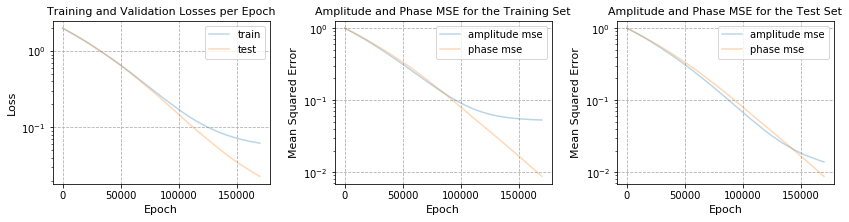

In [10]:
fig = PlotHistory(history, alpha = 0.3)

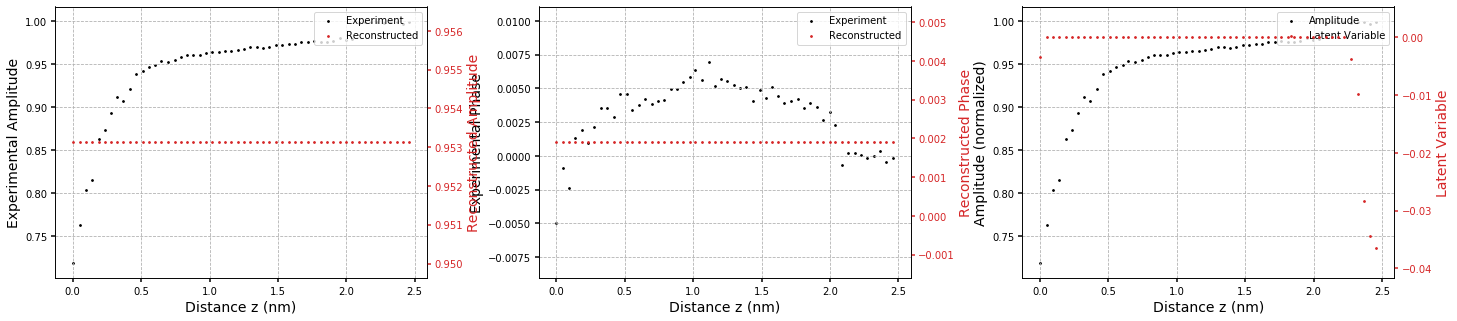

In [12]:
fig = PlotReconstruction(5, model, test, s = 3)

In [6]:
savepath = '/home/jhko725/Projects/Jhe_Lab/CP_Detection/Training Results/0714_results.zip'
model_load, hyper_load, hist_load = LoadModel(savepath)

/home/jhko725/anaconda3/envs/DL_GPU/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


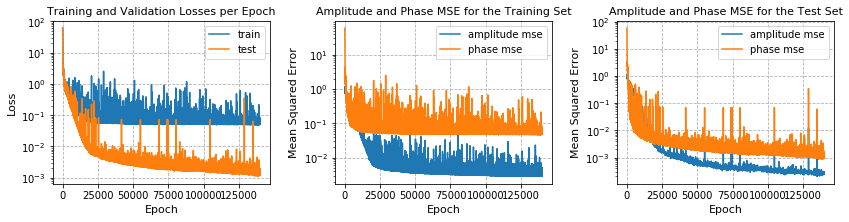

In [14]:
fig = PlotHistory(history)

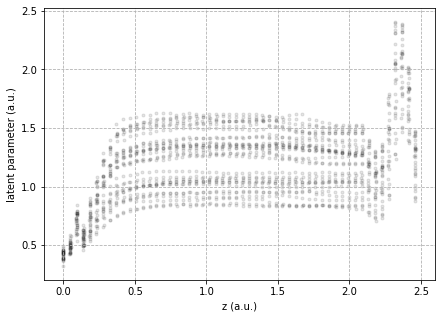

In [8]:
fig = PlotLatent(model['encoder'], test)

In [4]:
AbstractBlock = 'C:32|C:32|C:32:C:32'

In [5]:
import re
pattern = re.compile('[P,C]:[1-9]\d*\|{1,}[P,C]:[1-9]\d*')

In [6]:
print(re.match(pattern, AbstractBlock))

<_sre.SRE_Match object; span=(0, 9), match='C:32|C:32'>


In [23]:
pattern = re.compile('^[P,C]:\d+\|$')
print(re.search(pattern, 'P:32|'))

<_sre.SRE_Match object; span=(0, 5), match='P:32|'>


In [52]:
AbstractBlock.split('|')

['C:32', 'C:32', 'C:32']